#**IMPORT LIBRARIES**

In [1]:
import cv2
from tqdm import tqdm, trange
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sn
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.models import Model
import tensorflow as tf 
from tensorflow.keras.applications import *
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
witdh = 224
height = 224
batch_size = 32
classes = 5

#**LOADING TRAINING DATASET**

##**v1 Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_CV_IP/DATA/train/Balance/multiple_classes_v1.csv")
img_train_dir = "/content/drive/MyDrive/Project_CV_IP/DATA/train/Balance/Balance_Winner_csv"
data_gen = ImageDataGenerator(validation_split= 0.15
                              )


In [ ]:
train = train_gen.flow_from_dataframe(df,
                                         directory = img_train_dir,
                                         x_col = "imgs_name",
                                         y_col = ["0","1","2","3","4"],
                                         class_mode = "raw",
                                         target_size =(224,224),
                                         batch_size = batch_size,
                                         subset = "training",
                                         shuffle =True
                                         )                                 
valid_gen = data_gen.flow_from_dataframe(df,
                                         directory = img_train_dir,
                                         x_col = "imgs_name",
                                         y_col = ["0","1","2","3","4"],
                                         class_mode = "raw",
                                         batch_size = batch_size,
                                         target_size =(224,224),
                                         subset = "validation",
                                         shuffle = False
                                         )         

Found 5266 images belonging to 5 classes.


##**v2 Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_CV_IP/DATA/train/Balance/multiple_classes_v2.csv")
img_train_dir = "/content/drive/MyDrive/Project_CV_IP/DATA/train/Balance/Balance_Winner_csv"
data_gen = ImageDataGenerator(validation_split= 0.15
                              )


In [ ]:
train = train_gen.flow_from_dataframe(df,
                                         directory = img_train_dir,
                                         x_col = "imgs_name",
                                         y_col = ["0","1","2","3","4"],
                                         class_mode = "raw",
                                         target_size =(224,224),
                                         batch_size = batch_size,
                                         subset = "training",
                                         shuffle =True
                                         )                                 
valid_gen = data_gen.flow_from_dataframe(df,
                                         directory = img_train_dir,
                                         x_col = "imgs_name",
                                         y_col = ["0","1","2","3","4"],
                                         class_mode = "raw",
                                         batch_size = batch_size,
                                         target_size =(224,224),
                                         subset = "validation",
                                         shuffle = False
                                         )         

Found 3672 images belonging to 5 classes.


#**TRAINING** 

In [ ]:
model_efficientNet= tf.keras.applications.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= (224,224,3))
model = Sequential()
model.add(model_efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(5, activation = "sigmoid"))
#avg_pool = GlobalAveragePooling2D()(model_efficientNet.output)
#drop1 = Dropout(0.2)(avg_pool)
#dn1 = Dense(1024, activation= "relu")(drop1)
#drop2 = Dropout(0.2)(dn1)
#dn2 = Dense(5, activation= "softmax")(drop2)

In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v1/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.h5"

rd = ReduceLROnPlateau(monitor='val_loss', 
                       factor = 0.1, 
                       patience = 3, 
                       min_lr = 0.0000001) #giảm lr nếu ko cải thiện

es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   verbose = 1, 
                   patience=10) #dừng model nếu ko cải thiện
                   
hs = CSVLogger('/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v1/EfficientNetB5_MultipleClass_Winner_Balance_final.csv', append = True)

mc = ModelCheckpoint(checkpoint_path, 
                     monitor='val_accuracy', 
                     mode='max', 
                     save_best_only=True)

In [ ]:
model.fit(train_gen,
          validation_data= valid_gen,
          epochs = 100,
          verbose = 1,
          callbacks = [mc,es,hs,rd])

#**TEST**

##**v1 Model**

In [ ]:
model = load_model("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v1/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.h5")

##**v2 Model**

In [ ]:
model = load_model("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v2/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.h5")

##**Test**

In [ ]:
img_test_dir = "/content/drive/MyDrive/Project_CV_IP/DATA/test/Winner_croped_test"
test_gen = ImageDataGenerator()
test1 = test_gen.flow_from_directory(img_test_dir, 
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         target_size=(witdh, height),
                                         seed = 2,
                                         shuffle = False)

Found 53575 images belonging to 5 classes.


In [ ]:
predicts = model.predict(test1, verbose = 1)
np.save("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v2/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.npy", predicts)

1675/1675 [==============================] - 17242s 10s/step


In [ ]:
predicts = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v1/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.npy")
predict = predicts >0.8
predict = predict.astype(int).sum(axis = 1) -1

[0 0 0 ... 4 4 4]
[1 0 1 ... 2 1 1]


0.241495853345723

#**Evaluation**

##**v1 Model**

###**Plot Accuracy && Loss**

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data['accuracy']
    tloss=tr_data['loss']
    vacc=tr_data['val_accuracy']
    vloss=tr_data['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

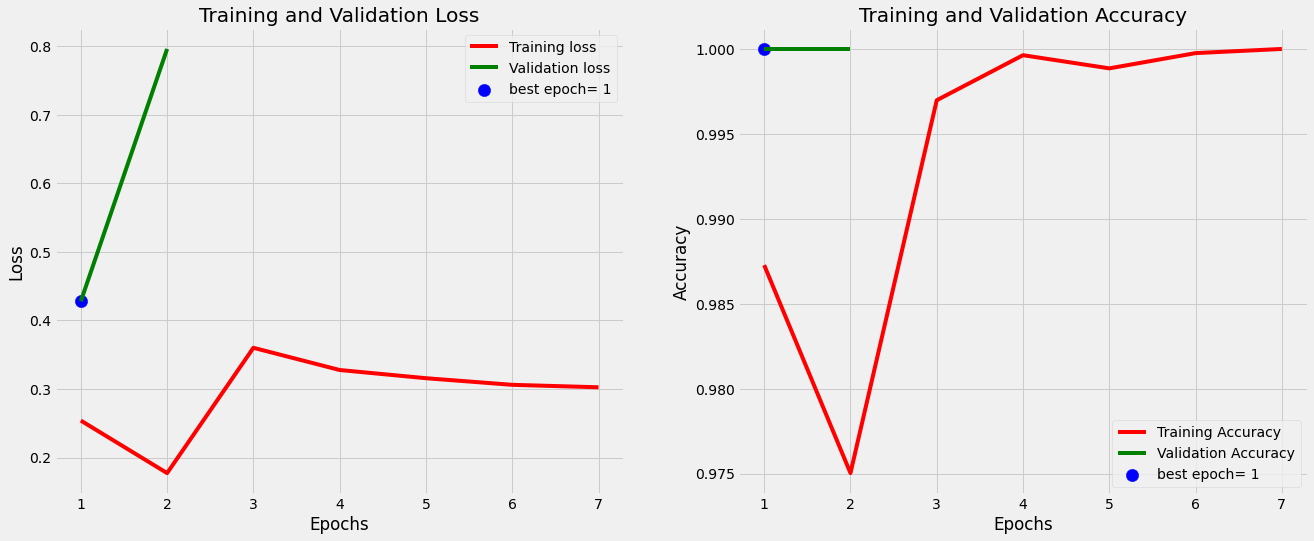

In [ ]:
history = pd.read_csv("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v1/EfficientNetB5_MultipleClass_Winner_Balance_final.csv")
tr_plot(history, 0)

###**Confusion Matrix**

In [3]:
true = np.load("/content/drive/MyDrive/Project_CV_IP/Others/test2.npy")

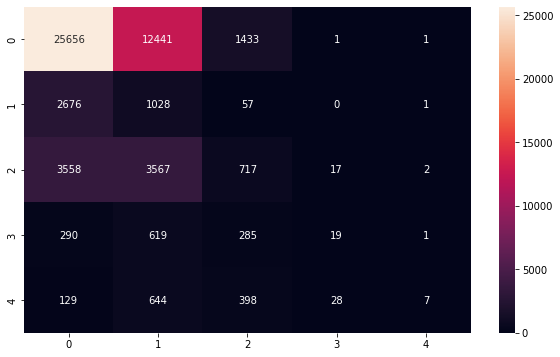

In [4]:
predicts = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v1/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.npy")
predict = predicts >0.8
predict = predict.astype(int).sum(axis = 1) -1
matrix = np.array(tf.math.confusion_matrix(true, predict))

df_cm = pd.DataFrame(matrix, 
                  index = [0,1,2,3,4] ,
                  columns = [0,1,2,3,4])
plt.figure(figsize = (10,6))
sn.heatmap(df_cm, annot=True, fmt= "d")

###**Accuracy & Kappa**

In [ ]:
from sklearn.metrics import cohen_kappa_score, accuracy_score
print("Kappa score: ", cohen_kappa_score(test1.classes,predict,weights= "quadratic"))
print("Accuracy score: ", accuracy_score(test1.classes, predict))

Kappa score:  0.241495853345723
Accuracy score:  0.5119365375641624


##**v2 Model**

###**Plot Accuracy && Loss**

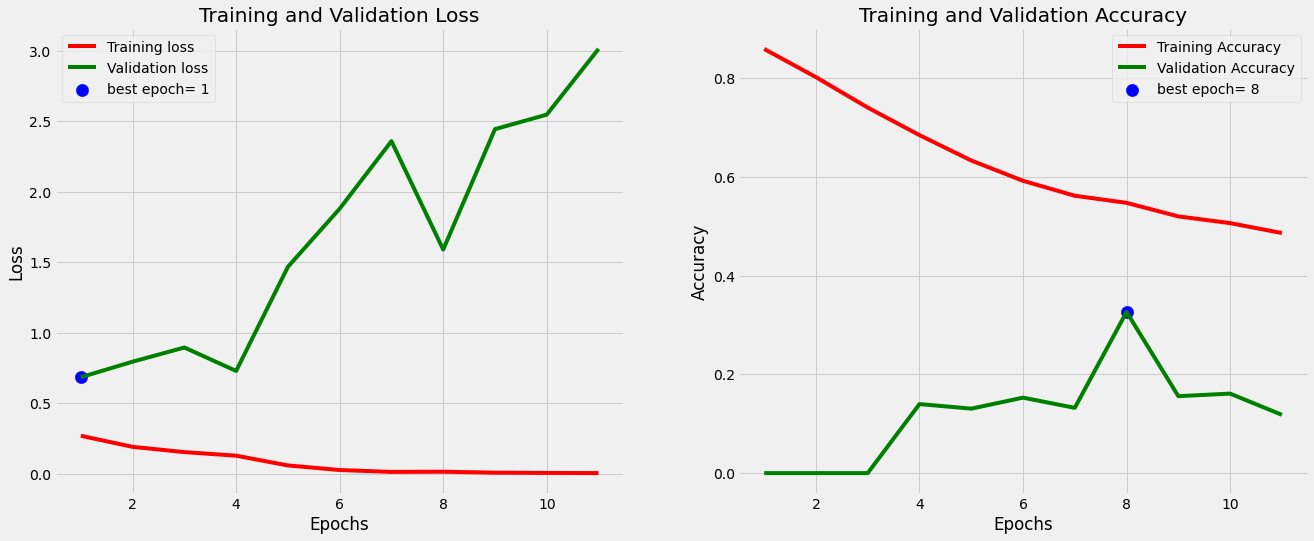

In [ ]:
history = pd.read_csv("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v3/EfficientNetB4_MultipleClass_Winner_Balance_final_v3.csv")
tr_plot(history, 0)

###**Confusion Matrix**

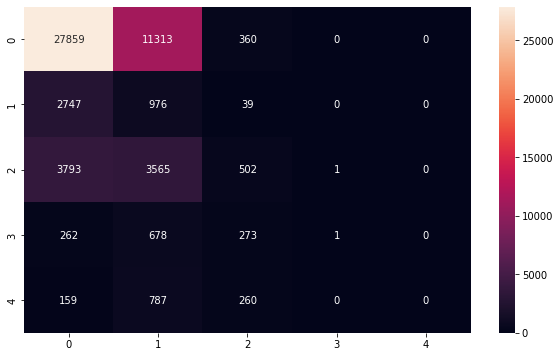

In [5]:
predicts = np.load("/content/drive/MyDrive/Project_CV_IP/WINNER/Multiple_Classes/v2/EfficientNetB5_MultipleClass_Winner_Balance_Checkpoint.npy")

predict = np.array([])
for pre in predicts:
  if pre[0]>0.7:
    predict = np.append(predict, 0)
  else:
    pre = pre > 0.7
    pre = pre.astype(int).sum()
    predict = np.append(predict, pre)
matrix = np.array(tf.math.confusion_matrix(true, predict))

df_cm = pd.DataFrame(matrix, 
                  index = [0,1,2,3,4] ,
                  columns = [0,1,2,3,4])
plt.figure(figsize = (10,6))
sn.heatmap(df_cm, annot=True, fmt= "d")

###**Accuracy & Kappa**

In [ ]:
from sklearn.metrics import cohen_kappa_score, accuracy_score
print("Kappa score: ", cohen_kappa_score(test1.classes,predict,weights= "quadratic"))
print("Accuracy score: ", accuracy_score(test1.classes, predict))

Kappa score:  0.25425262512283653
Accuracy score:  0.5476061595893608
